In [1]:
%matplotlib inline

# *হাবল এবং ডেসির উপাখ্যান*

১৯২৯ সালটি আমাদের কাছে এনেছিল অস্কার, প্রথম গাড়ির রেডিও এবং এডউইন হাবলের অপ্রত্যাশিত পর্যবেক্ষণ যে সমস্ত ছায়াপথগুলি (galaxies) আমাদের থেকে দূরে সরে যাচ্ছে!

![title](images/edwin-hubble.jpg)

আসুন আমরা হাবলের এমন দুটি ছায়াপথকে এক ঝলক দেখে নেই, ত্রিকোণ (Triangulum) এবং বৃহৎ ম্যাজেলানিক মেঘ (Large Magellanic Cloud)।

![title](images/Triangulum.jpg)
![title](images/LMC.jpg)

হাবল আমাদের থেকে সর্বমোট ২৪টি ছায়াপথের দূরত্ব ও তাদের `লালসরণ'(redshift) মেপে ছিলেন। কিন্তু এর অর্থ কী?

হতে পারে আপনি ইতিমধ্যে জানেন যে হাইড্রোজেনের শক্তির স্তরগুলি __কোয়ান্টাইত__ (quantized), অর্থাৎ স্তরগুলোর শক্তির পরিমাণ নির্দিষ্ট, এবং ইলেক্ট্রনগুলো __বিচ্ছিন্ন__ (discrete) খোলে (shell) এ বাস করে যেগুলোর শক্তির পরিমাণ নির্দিষ্ট করা। ইলেক্ট্রনগুলো যখন এক স্তর থেকে অন্য আরেক স্তরে স্থানান্তারিত হয়, তখন তা থেকে আলোককণা নির্গত হয় এবং তার তরঙ্গদৈর্ঘ্য আমরা "রাইডবার্গ" এর সূত্র ব্যাবহার করে পেতে পারিঃ

$$
\lambda_{\rm vac} = 1.096 \times 10^{7} \left ( \frac{1}{n^2} - \frac{1}{m^2} \right ) 
$$

যেখানে $n$ ও $m$ (তারা $[0, 1, 2, ... \infty]$ এর মধ্যে যেকোনো মান নিতে পারে) দুটি শক্তির স্তরকে চিহ্নিত করে। 

In [4]:
# First, let's import some useful packages:
import astropy
import pylab           as     pl
import pandas          as     pd
import numpy           as     np

from   matplotlib      import pyplot as plt
from   scipy           import stats
from   IPython.display import Image
from   tools.wave2rgb  import wavelength_to_rgb

ModuleNotFoundError: No module named '__main__.tools'; '__main__' is not a package

In [3]:
def Rydberg(n, m):
    # Vacuum wavelengths [nanometres]
    result = 1.096e-2 * (1. / n / n - 1. / m / m)
    return 1. / result

আসুন আমরা হাইড্রোজেন নির্গত করতে পারে এমন আলোর তরঙ্গদৈর্ঘ্যের হিসেবটা করে ফেলিঃ 

In [4]:
waves = []

print('n \t m \t Wavelength [nm]')

for n in np.arange(1, 10, 1):
    for m in np.arange(n+1, 10, 1):
        wave = Rydberg(n, m)        
        waves.append(wave)
        
        print('{:d} \t {:d} \t {:.3f}'.format(n, m, wave))

n 	 m 	 Wavelength [nm]
1 	 2 	 121.655
1 	 3 	 102.646
1 	 4 	 97.324
1 	 5 	 95.043
1 	 6 	 93.848
1 	 7 	 93.142
1 	 8 	 92.689
1 	 9 	 92.381
2 	 3 	 656.934
2 	 4 	 486.618
2 	 5 	 434.480
2 	 6 	 410.584
2 	 7 	 397.405
2 	 8 	 389.294
2 	 9 	 383.923
3 	 4 	 1876.955
3 	 5 	 1283.075
3 	 6 	 1094.891
3 	 7 	 1005.931
3 	 8 	 955.541
3 	 9 	 923.814
4 	 5 	 4055.150
4 	 6 	 2627.737
4 	 7 	 2167.662
4 	 8 	 1946.472
4 	 9 	 1819.203
5 	 6 	 7465.163
5 	 7 	 4657.086
5 	 8 	 3743.215
5 	 9 	 3299.335
6 	 7 	 12380.685
6 	 8 	 7507.821
6 	 9 	 5912.409
7 	 8 	 19075.426
7 	 9 	 11316.720
8 	 9 	 27823.100


এখন আসুন আমরা তরঙ্গদৈর্ঘ্যগুলির লেখচিত্র তৈরি করি ও এই তরঙ্গদৈর্ঘ্যগুলির রঙ পর্যবেক্ষণ করি। যদি আমরা নির্গত হাইড্রোজেন পরমাণুর দিকে তাকাতাম, তবে আমরা এই রঙগুলোই দেখতে পেতামঃ

(380.0, 780.0)

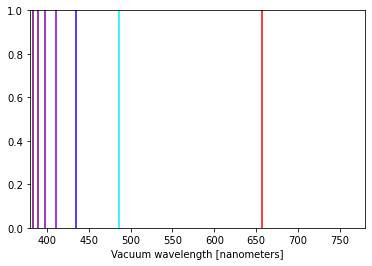

In [5]:
for wave in waves:
  # color = [r, g, b]
  color = wavelength_to_rgb(wave)       
  pl.axvline(x=wave, c=color)

pl.xlabel('Vacuum wavelength [nanometers]')
pl.xlim(380., 780.)

যদি হাইড্রোজেন একটি চলমান ছায়াপথের মধ্যে উপস্থিত থাকে তবে আমরা দেখব যে উপরের চিহ্নিত তরঙ্গদৈর্ঘ্যগুলির ডপলার স্থানান্তরিত (Doppler shifted) হয়েছে। আমরা এটিকে ছায়াপথটির "লালসরণ" বলব, যেটি সাধারণত ইংরেজি z (https://en.wikedia.org/wiki/Redshift) চলক (variable) দ্বারা চিহ্নিত হয়ে থাকে। আসুন ধরা যাক যে এই ছায়াপথটি আলোর গতির ১% গতিতে চলছে (v = 0.1 * c)। আমরা নীচের সমীকরণের মাধ্যমে তার লালসরণ গণনা করতে পারিঃ 

$$
1 + z = \sqrt{\frac{1 + v/c}{1 + v/c}}
$$

In [6]:
def redshift(v):
    # v [speed of light].
    result = (1. + v) / (1. - v) 
    result = np.sqrt(result) - 1.
    
    return  result

(380.0, 780.0)

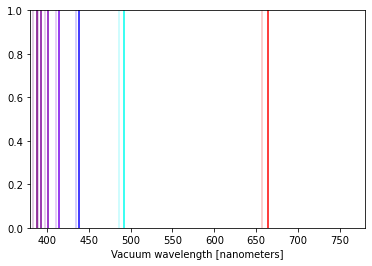

In [7]:
zz = redshift(0.01) 

for restwave in waves:
  obswave = (1. + zz) * restwave     

  color   = wavelength_to_rgb(restwave)       
  pl.axvline(x=restwave, c=color, alpha=0.25)

  color   = wavelength_to_rgb(obswave)       
  pl.axvline(x=obswave, c=color)

pl.xlabel('Vacuum wavelength [nanometers]')
pl.xlim(380., 780.)

উপরে আমরা দেখতে পাচ্ছি হাইড্রোজেনের মূল তরঙ্গরেখাগুলি (স্বচ্ছ রঙ) এবং একই রেখাগুলি যখন তারা একটি চলমান ছায়াপথ এর হাইড্রোজেন থেকে নির্গত হচ্ছে (গাঢ় রঙ)। এই বিষয়ে আরও বিশদ জানতে চাইলে আপনি https://en.wikedia.org/wiki/Doppler_effect সাইটটি পড়তে পারেন।

হাবল হাইড্রোজেন এবং অন্যান্য অনেক মৌলের নির্দিষ্ট তরঙ্গরেখাগুলি জানতেন। তাই, উপরের লেখচিত্রের মতন তিনি স্বচ্ছ ও গাঢ় রঙের রেখাগুলির মধ্যে পার্থক্য মেপে তিনি অনেক ছায়াপথের বেগ নির্ণয় করতে সক্ষম হন। তিনি এইসব ছায়াপথগুলোর দূরত্ব মাপতে পেরেছিলেন (এজন্য তিনি এইসব ছায়াপথের মধ্যে অবস্থিত কিছু বিশেষ তারার উজ্জ্বলতা ব্যাবহার করেছিলেন - https://en.wikedia.org/wiki/Cepheid_variable) এবং একই সাথে তারা কত দ্রুত আমাদের থেকে সরে যাচ্ছে তাও মাপতে পেরেছিলেন (উপরের মতো তাদের লালসরণ থেকে):

In [8]:
dat = pd.read_csv('dat/hubble.dat', sep='\s+', comment='#', names=['Galaxy name', 'Distance [Mpc]', 'Velocity [km/s]'])
dat

,Galaxy name,Distance [Mpc],Velocity [km/s]
0,S.Mag,0.032,170
1,L.Mag,0.034,290
2,NGC6822,0.214,-130
3,NGC598,0.263,-70
4,NGC221,0.275,-185
5,NGC224,0.275,-220
6,NGC5457,0.450,200
7,NGC4736,0.500,290
8,NGC5194,0.500,270
9,NGC4449,0.630,200


এবার এসকল ছায়াপথগুলোর লেখচিত্র করা যাক। আমরা x-অক্ষে দূরত্ব ও y-অক্ষে তাদের গতির লেখচিত্র তৈরি করব। 

In [9]:
fig = plt.figure(figsize=(10, 7.5))
ax  = fig.add_subplot(1, 1, 1)
plt.close()

In [10]:
label_style = {'fontname': 'Georgia', 'fontsize': 16} 

In [11]:
ax.plot(dat['Distance [Mpc]'], dat['Velocity [km/s]'], '-', c='k', marker='*', lw=0)

ax.set_xlabel('Distance from us [Megaparsecs]', **label_style)
ax.set_ylabel('Recession velocity [km/s]', **label_style)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

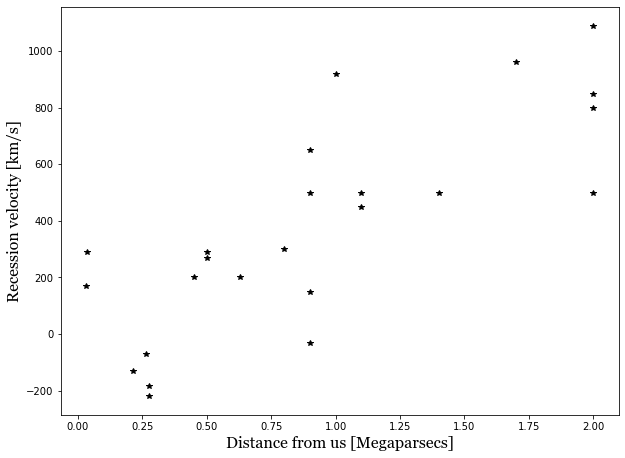

In [12]:
fig

Edwin saw a clear trend, but the measurements seemed pretty noisy.  Let's figure out our best guess at the true relationship between the two.  We'll look at a linear relationship (regression) using the scipy stats package:

এডউইন একটি স্পষ্ট প্রবণতা দেখেছিলেন, তবে পরিমাপগুলির মধ্যে বেশ ত্রুটি (noise) ছিল। আমরা এখন এই দুটি চলকের (variable) মধ্যকার সম্পর্ক কী তা সম্পর্কে একটি শ্রেষ্ঠ অনুমান বের করব। <u> আমরা `scipy` প্যাকেজটি ব্যাবহার করে একটি লিনিয়ার সম্পর্ক (রিগ্রেশন) পরিমাপ করবঃ</u>

In [13]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dat['Distance [Mpc]'],dat['Velocity [km/s]'])

In [14]:
print('The gradient to this trend is known as the Hubble constant:  {:.3f} [km/s/Mpc]'.format(slope))

The gradient to this trend is known as the Hubble constant:  454.158 [km/s/Mpc]


মুদ্রণ ('এই প্রবণতার গ্রেডিয়েন্ট হাবল ধ্রুবক হিসাবে পরিচিত: {: .3f} [কিমি / সে / এমপিসি]'। ফর্ম্যাট (opeাল))

Let's see what that looks like. 

আসুন দেখে নেওয়া যাক কি দেখতে।

In [15]:
distances  = np.linspace(-0.5, 2.5, 10)
velocities = slope * distances

ax.plot(distances, velocities, lw=0.25, c='k')
ax.set_xlim(0.0, 2.5)

(0.0, 2.5)

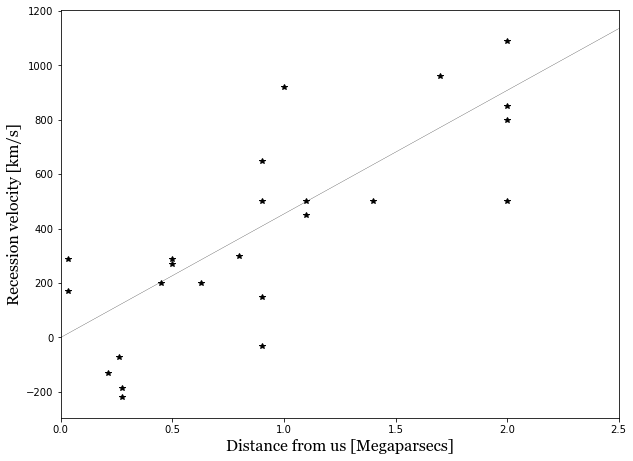

In [16]:
fig

Seems a pretty good fit! 

দেখতে বেশ ভাল ফিট!

Now it's your turn, can you figure out a good estimate of the error on this measurement of the Hubble costant.  How accurately can we predict the recession of a galaxy at a given distance, i.e. how fast or slow could it be moving?    

এখন আপনার পালা, আপনি কি হাবল খরচের এই পরিমাপের ত্রুটির একটি ভাল অনুমান করতে পারেন? নির্ধারিত দূরত্বে গ্যালাক্সির মন্দা কতটা সঠিকভাবে আমরা পূর্বাভাস দিতে পারি, অর্থাৎ এটি কত দ্রুত বা ধীর গতিতে চলতে পারে?

So in conclusion, every galaxy is likely to be moving away from us!  We find this to be true of all galaxies - we are not at center or special in any way.  Every galaxy is moving away from every other.  The fact that the Universe was expanding came as a shock to many in 1929, but an even greater surprise was in store.    

সুতরাং উপসংহারে, প্রতিটি ছায়াপথ সম্ভবত আমাদের থেকে দূরে চলেছে! আমরা এটি সমস্ত ছায়াপথের ক্ষেত্রে সত্য বলে মনে করি - আমরা কোনওভাবেই কেন্দ্র বা বিশেষ নই। প্রতিটি ছায়াপথ একে অপরের থেকে দূরে চলেছে। মহাবিশ্বের সম্প্রসারণের বিষয়টি ১৯৯৯ সালে অনেকের কাছে একটি ধাক্কা হিসাবে আসে, তবে এর চেয়েও বড় অবাক হওয়ার বিষয় ছিল।

# *Dark Energy*

# *অন্ধকার শক্তি*

In 1998, the world would change forever.  Larry Page and Sergey Brin founded Google, the American Unity node and Russian Zarya module would be brought together to form the [International Space Station](https://en.wikipedia.org/wiki/International_Space_Station), and Lawrence Berkeley Lab's
very own Saul Perlmutter, Brian Schmidt and Adam Reiss irrefutably confirmed the existence of _Dark Energy_. Here's Saul impressing some young Berkeley researchers with these results at the time:

1998 সালে, পৃথিবী চিরতরে পরিবর্তিত হত। ল্যারি পেজ এবং সের্গেই ব্রিন গুগল প্রতিষ্ঠা করেছিলেন, আমেরিকান ইউনিটি নোড এবং রাশিয়ান জারিয়া মডিউলকে একত্রিত করে [আন্তর্জাতিক স্পেস স্টেশন] গঠন করা হবে (https://en.wikedia.org/wiki/ আন্তর্জাতিক _স্থান_ স্টেশন ), এবং লরেন্স বার্কলে ল্যাব এর
খুব নিজস্ব শৌল পার্লমুটার, ব্রায়ান শ্মিট এবং অ্যাডাম রিস অকাট্যভাবে _অন্ধকার শক্তি_ এর অস্তিত্ব নিশ্চিত করেছেন। শৌল এই সময়ে এই ফলাফলগুলি দিয়ে কিছু তরুণ বার্কলে গবেষককে মুগ্ধ করেছেন:

![title](images/perlmutter.png)

So what was everyone looking at?  Let's breakdown the data.

তাহলে সবাই কি তাকিয়ে ছিল? এর ডেটা ভাঙ্গা যাক।

Saul and his team measured the redshift ($z$) and the effective magnitude for several Type Ia Supernovae (https://en.wikipedia.org/wiki/Type_Ia_supernova)

শৌল এবং তার দলটি বিভিন্ন ধরণের আইএ সুপারনোভা (https://en.wikedia.org/wiki/Type _আইএ_ সুপারনোভা) এর জন্য redshift ($z$) এবং কার্যকর মাত্রা পরিমাপ করেছে

In [17]:
dat     = pd.read_csv('dat/perlmutter.txt', names=['z', 'Effective magnitude'], comment='#', sep='\s+')
toprint = dat[:10]
toprint

,z,Effective magnitude
0,0.458,23.11
1,0.354,22.38
2,0.425,22.13
3,0.374,21.72
4,0.420,22.55
5,0.372,22.26
6,0.378,22.58
7,0.453,23.17
8,0.465,23.33
9,0.498,23.71


A plot would show this a lot more clearly:

একটি চক্রান্ত এটি আরও অনেক স্পষ্টভাবে দেখায়:

Text(0, 0.5, 'Effective magnitude')

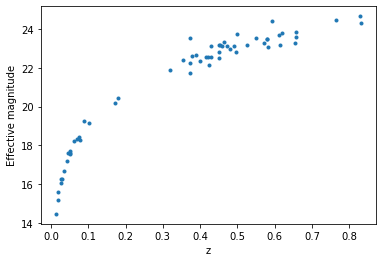

In [18]:
pl.plot(dat['z'], dat['Effective magnitude'], marker='.', lw=0.0)

pl.xlabel('z')
pl.ylabel('Effective magnitude')

Saul has good reason to believe (really, he had to tweak them a bit first) that every [type Ia supernovae](https://en.wikipedia.org/wiki/Type_Ia_supernova) shown here was equally bright intrinsically, but those at high redshift appeared relatively faint compared to those at low redshift, as they were simply further away.  This explains the trend shown, given that 'effective magnitude' is the awkward way in which astronomers typically express how bright something appears.

শৌলের বিশ্বাস করার উপযুক্ত কারণ রয়েছে (সত্যই, তিনি তাদের প্রথমে কিছুটা টুইট করতে পেরেছিলেন) যে প্রতি [টাইপ করা আইএ সুপারনোভা] (https://en.wikedia.org/wiki/Type _আইএ_ সুপারনোভা) এখানে দেখানো হয়েছে স্বতঃস্ফূর্তভাবে স্বভাবতই উজ্জ্বল ছিল, তবে উচ্চ রেডশিফটে যারা কম রেডশিফ্টে ছিলেন তাদের তুলনায় তুলনামূলকভাবে ম্লান দেখা গেল, কারণ তারা আরও দূরে ছিল। এটি প্রদর্শিত ট্রেন্ডকে ব্যাখ্যা করে যে, 'কার্যকর মাত্রা' হল এমন এক বিশ্রী উপায় যা জ্যোতির্বিদরা সাধারণত প্রকাশ করেন যে কতটা উজ্জ্বল প্রদর্শিত হয় appears

The useful thing about this measurement is that how far away a supernovae or galaxy is for a given redshift depends on a few parameters, one of which is how much Dark Energy there might be in the Universe.  Almost everyone expected this data to prove there was _no_ _Dark Energy_ when Saul made it, but a few guessed otherwise.  

When Hubble discovered the expansion, a natural consequence was that the amount of (rest mass) energy contained within a cubic meter would dilute with time.  Dark Energy would be special, as the amount of energy per cubic meter would instead be constant with time and would suggest that spooky effects of [quantum mechanics](https://en.wikipedia.org/wiki/Quantum_mechanics) would be causing the galaxies to separate.         

এই পরিমাপ সম্পর্কে দরকারী জিনিসটি হ'ল কোনও প্রদত্ত রেডশিফ্টের জন্য সুপারনোভা বা গ্যালাক্সি কতটা দূরে রয়েছে তা কয়েকটি পরামিতিগুলির উপর নির্ভর করে, এর মধ্যে একটি হ'ল মহাবিশ্বে ডার্ক এনার্জি কতটা থাকতে পারে। প্রায় সকলেই এই ডেটা প্রমাণ করার জন্য প্রত্যাশা করেছিলেন যে শৌল যখন এটি তৈরি করেছিলেন তখন _না_ _অন্ধকার শক্তি_ ছিল, তবে কয়েক জন অন্যথায় অনুমান করেছিলেন।

হাবল যখন প্রসারণটি আবিষ্কার করলেন, তখন একটি প্রাকৃতিক পরিণতি হ'ল একটি ঘনমিটারের মধ্যে থাকা (বিশ্রামের ভর) শক্তির পরিমাণ সময়ের সাথে মিশে যায়। ডার্ক এনার্জি বিশেষ হবে, কারণ প্রতি ঘনমিটারে শক্তির পরিমাণ সময়ের পরিবর্তে স্থির ছিল এবং পরামর্শ দেয় যে [কোয়ান্টাম মেকানিক্স] (https://en.wikedia.org/wiki/Quantum_mechanics) এর মজাদার প্রভাব তৈরি করবে ছায়াপথ পৃথক।

So let's use Saul's data to figure out how much Dark Energy is in the Universe.  First, we need a model for the (luminosity) distance of a supernovae at a given redshift, given some amount of Dark Energy.  We use $\Omega_\Lambda$ to denote the _fraction_ of all matter that behaves like Dark Energy. 

সুতরাং আসুন শৌলের ডেটা ব্যবহার করে মহাবিশ্বে ডার্ক এনার্জি কত রয়েছে তা নির্ধারণ করতে। প্রথমত, আমাদেরকে কিছু পরিমাণ অন্ধকার শক্তি প্রদত্ত রেডশিফ্টে সুপারনোভা-র (আলোকিতকরণ) দূরত্বের জন্য একটি মডেল প্রয়োজন। আমরা গাark় শক্তির মতো আচরণ করে এমন সমস্ত বিষয়ের _ভগ্নাংশ_ বোঝাতে ম্যাথিড 1 ব্যবহার করি।

In [19]:
from astropy.cosmology import FlatLambdaCDM

def lumdist(z, olambda):
  cosmo = FlatLambdaCDM(H0=70, Om0=1. - olambda, Tcmb0=2.725)
    
  return  cosmo.luminosity_distance(z)   

We then need to convert this distance into how astronomers measure brightness:

আমাদের তখন এই দূরত্বকে রূপান্তর করতে হবে জ্যোতির্বিজ্ঞানীরা কীভাবে উজ্জ্বলতা পরিমাপ করে:

In [20]:
def effmag(z, olambda, MB):
  DL = lumdist(z, olambda)   

  return MB + 5. * np.log10(DL.value)    

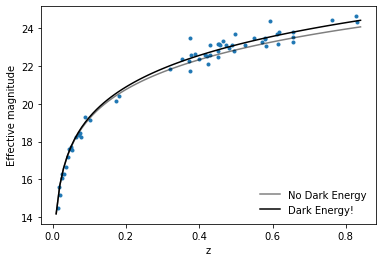

In [21]:
zs = np.arange(0.01, 0.85, 0.01)

pl.plot(dat['z'], dat['Effective magnitude'], marker='.', lw=0.0)

pl.plot(zs, effmag(zs, 0.0, 6.), c='k', label='No Dark Energy', alpha=0.5)
pl.plot(zs, effmag(zs, 0.5, 6.), c='k', label='Dark Energy!')

pl.xlabel('z')
pl.ylabel('Effective magnitude')

pl.legend(loc=4, frameon=False)

Even by eye, the data looks to prefer some Dark Energy.  But there's not a huge amount in it.  Let's figure out what exactly the data prefers.  To do this, we'll assume that minimising the distance between each point and the line is the best measure of how well the theory fits the data (see https://en.wikipedia.org/wiki/Least_squares).  Together with the fraction of Dark Energy, we also don't know how bright every supernovae is intrinsically so we'll fit for that simultaneously.   

এমনকি চোখ দ্বারা, তথ্য কিছু অন্ধকার শক্তি পছন্দ করে বলে মনে হচ্ছে। তবে এতে বিশাল পরিমাণ নেই। আসুন চিত্রটি ঠিক কী পছন্দ করে তা নির্ধারণ করুন। এটি করার জন্য, আমরা ধরে নেব যে প্রতিটি পয়েন্ট এবং রেখার মধ্যে দূরত্ব হ্রাস করা তত্ত্বটি ডেটাটি কতটা ঠিক ফিট করে তার সেরা পরিমাপ (https://en.wikedia.org/wiki/Least_squares দেখুন)। ডার্ক এনার্জির ভগ্নাংশের সাথে, আমরা জানি না যে প্রতিটি সুপারনোভা অভ্যন্তরীণভাবে কতটা উজ্জ্বল, তাই আমরা একই সাথে এটির জন্য ফিট করব।

In [22]:
from scipy.optimize import minimize

In [23]:
def chi2(x):
     olambda = x[0]
     MB      = x[1] 
    
     model   = effmag(dat['z'], olambda, MB) 
     
     return  np.sum((dat['Effective magnitude'] - model)**2.) 

In [24]:
res = minimize(chi2, x0=[0.5, 5.0], options={'disp': True})

Optimization terminated successfully.
         Current function value: 6.018565
         Iterations: 10
         Function evaluations: 39
         Gradient evaluations: 13


In [25]:
res.x

array([0.75146006, 5.82802908])

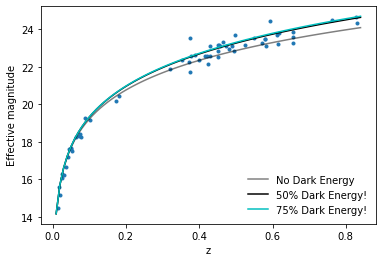

In [26]:
zs = np.arange(0.01, 0.85, 0.01)

pl.plot(dat['z'], dat['Effective magnitude'], marker='.', lw=0.0)

pl.plot(zs, effmag(zs, 0.0, 6.), c='k',   label='No Dark Energy', alpha=0.5)
pl.plot(zs, effmag(zs, 0.7, 6.), c='k',   label='50% Dark Energy!')
pl.plot(zs, effmag(zs, 0.751, 6.), c='c', label='75% Dark Energy!')

pl.xlabel('z')
pl.ylabel('Effective magnitude')

pl.legend(loc=4, frameon=False)

So there's something like 75% dark energy in the Universe!  As the first people to make this measurement, Saul, together with Brian Schmidt and Adam Reiss, would be awarded the 2011 Nobel Prize for their work.

সুতরাং মহাবিশ্বে 75% অন্ধকার শক্তির মতো কিছু আছে! এই পরিমাপটি তৈরি করার প্রথম ব্যক্তি হিসাবে, শৌল, ব্রায়ান শমিট এবং অ্যাডাম রিসকে সাথে নিয়ে তাদের কাজের জন্য ২০১১ সালের নোবেল পুরষ্কার পেয়েছিলেন।

![title](images/perlmutter_nobel.jpg)

You can find all the details here:  https://arxiv.org/pdf/astro-ph/9812133.pdf.  Warning, this is for the pros so don't worry if you don't understand much.

আপনি এখানে সমস্ত বিবরণ পেতে পারেন: https://arxiv.org/pdf/astro-ph/9812133.pdf। সতর্কতা, এটি পেশাদারদের জন্য তাই আপনি যদি বেশি কিছু না বুঝতে পারেন তবে চিন্তা করবেন না।

The primary motivation for DESI is to repeat similar distant-redshift measurements much more precisely and learn much more about this spooky Dark Energy.

DESI- এর প্রাথমিক অনুপ্রেরণা হ'ল অনুরূপ দূরবর্তী-রেডশিফ্ট পরিমাপকে আরও স্পষ্টভাবে পুনরাবৃত্তি করা এবং এই মাতাল অন্ধকার শক্তি সম্পর্কে আরও অনেক কিছু শিখতে।